In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv("Breast_cancer_data.csv")

In [60]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [90]:
data['mean_radius'].mean()

14.127291739894563

In [61]:
data.shape

(569, 6)

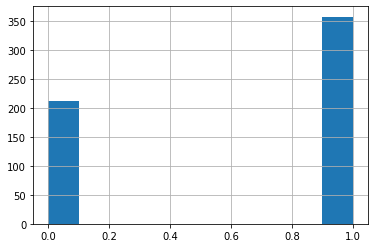

In [62]:
data['diagnosis'].hist()

In [82]:
cor = data.corr()
cor

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


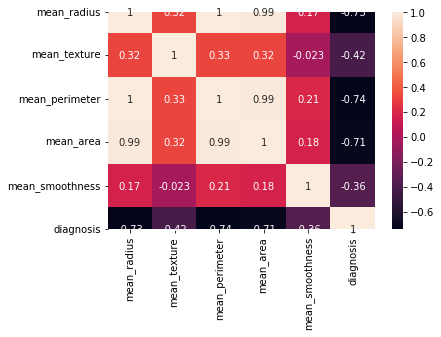

In [83]:
sns.heatmap(cor, annot = True)

In [84]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


## Prior Probability

In [86]:
def calculate_prior(data, Y):
    classes = sorted(list(data[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(data[data[Y] == i])/ len(data))
    return prior

In [88]:
calculate_prior(data, 'diagnosis')

[0.37258347978910367, 0.6274165202108963]

In [89]:
data['diagnosis'].unique()

array([0, 1], dtype=int64)

## Gaussian Distribution

In [91]:
def calculate_likelihood(data, f_name, f_val, Y, label):
    f = list(data.columns)
    data = data[data[Y] == label]
    mean, std = data[f_name].mean(), data[f_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((f_val - mean)**2/ (2 * std**2)))
    return p_x_given_y

In [92]:
def naive_bayes_classifier(data, X, Y):
    
    # get features
    features = list(data.columns)[:-1]
    
    # calculate prior
    prior = calculate_prior(data, Y)
    
    y_pred = []
    
    for x in X:
        # calculate likelihood
        labels = sorted(list(data[Y].unique()))
        likelihood = [1] * len(labels)
        for j in range(len(labels)):
            for k in range(len(features)):
                likelihood[j] *= calculate_likelihood(data, features[k], x[k], Y, labels[j])
                
        
        # calculate poterior probability
        
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
            
        y_pred.append(np.argmax(post_prob))
        
    return np.array(y_pred)

## Test Gaussian Model

In [93]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:,-1].values

y_pred = naive_bayes_classifier(train, X = X_test, Y = 'diagnosis')

In [95]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [96]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9473684210526315


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

